# DC vs CSK

**-by sindhura gundubogula**

**STEP-1 import all required python libraries**

In [843]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**STEP-2 Load the dataset**

In [844]:
deliveries = pd.read_csv("deliveries.csv")
matches    = pd.read_csv("matches.csv")

In [845]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [846]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [847]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [848]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

**QUESTION1 : WHO WILL WIN THE MATCH?**

**performing exploratory data analysis only on CSK VS DC match data**

In [849]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [850]:
CD = matches.loc[(matches['team1'] == 'Chennai Super Kings') & (matches['team2'] == 'Delhi Capitals')]
CD

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
745,11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon,Ian Gould


In [851]:
DC = matches.loc[(matches['team2'] == 'Chennai Super Kings') & (matches['team1'] == 'Delhi Capitals')]
DC

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
700,11141,2019,Delhi,26/03/19,Delhi Capitals,Chennai Super Kings,Delhi Capitals,bat,normal,0,Chennai Super Kings,0,6,SR Watson,Feroz Shah Kotla Ground,Marais Erasmus,Nitin Menon,Anil Dandekar
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [852]:
c_vs_d= pd.DataFrame({'team1':CD['team1'],'team2':CD['team2'],'winner':CD['winner']})  

In [853]:
c_vs_d

,team1,team2,winner
745,Chennai Super Kings,Delhi Capitals,Chennai Super Kings


In [854]:
d_vs_c=pd.DataFrame({'team1':DC['team1'],'team2':DC['team2'],'winner':DC['winner']})  

In [855]:
d_vs_c

,team1,team2,winner
700,Delhi Capitals,Chennai Super Kings,Chennai Super Kings
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings


In [856]:
frames = [c_vs_d,d_vs_c]
CSK_VS_DC = pd.concat(frames)

In [857]:
CSK_VS_DC

,team1,team2,winner
745,Chennai Super Kings,Delhi Capitals,Chennai Super Kings
700,Delhi Capitals,Chennai Super Kings,Chennai Super Kings
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings


In [858]:
CSK_VS_DC['winner'].value_counts()

Chennai Super Kings    3
Name: winner, dtype: int64

In all dc vs csk, csk won every time

lets analyze overall win data

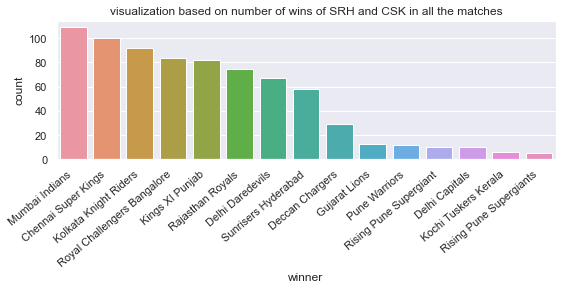

In [859]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='winner',data=matches, order = matches['winner'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('visualization based on number of wins of SRH and CSK in all the matches')
plt.show()

From the above visualizations we can observe that **CSK** has more wins compared to **DC**

Lets find out number of matches played by CSK and DC

In [860]:
a = matches.loc[(matches['team1'] == 'Delhi Capitals')]

In [861]:
b = matches.loc[(matches['team1'] == 'Chennai Super Kings')]

In [862]:
c = matches.loc[(matches['team2'] == 'Delhi Capitals')]

In [863]:
d = matches.loc[(matches['team2'] == 'Chennai Super Kings')]

In [864]:
a1 = pd.DataFrame({'team':a['team1'],'winner':a['winner']})  

In [865]:
b1 = pd.DataFrame({'team':b['team1'],'winner':b['winner']})  

In [866]:
c1 = pd.DataFrame({'team':c['team2'],'winner':c['winner']})  

In [867]:
d1 = pd.DataFrame({'team':d['team2'],'winner':d['winner']})  

In [868]:
frames = [a1,b1,c1,d1]
total = pd.concat(frames)

In [869]:
total

,team,winner
698,Delhi Capitals,Delhi Capitals
700,Delhi Capitals,Chennai Super Kings
711,Delhi Capitals,Sunrisers Hyderabad
725,Delhi Capitals,Delhi Capitals
741,Delhi Capitals,Delhi Capitals
...,...,...
734,Chennai Super Kings,Royal Challengers Bangalore
736,Chennai Super Kings,Chennai Super Kings
739,Chennai Super Kings,Mumbai Indians
754,Chennai Super Kings,Chennai Super Kings


In [870]:
total.index.unique()

Int64Index([698, 700, 711, 725, 741, 754,  60,  66,  73,  78,
            ...
            695, 696, 710, 718, 720, 724, 734, 736, 739, 755],
           dtype='int64', length=177)

In [871]:
total.index.drop_duplicates(keep='first')


Int64Index([698, 700, 711, 725, 741, 754,  60,  66,  73,  78,
            ...
            695, 696, 710, 718, 720, 724, 734, 736, 739, 755],
           dtype='int64', length=177)

In [872]:
total['team'].value_counts()

Chennai Super Kings    164
Delhi Capitals          16
Name: team, dtype: int64

In [873]:
total['winner'].value_counts()

Chennai Super Kings            103
Mumbai Indians                  18
Kings XI Punjab                 10
Delhi Capitals                  10
Royal Challengers Bangalore      8
Kolkata Knight Riders            7
Rajasthan Royals                 7
Delhi Daredevils                 6
Sunrisers Hyderabad              4
Deccan Chargers                  4
Pune Warriors                    2
Kochi Tuskers Kerala             1
Name: winner, dtype: int64

calculating the win probability manually = total wins/ total matches played

In [874]:
win_probability_CSK = 103/164

win_probability_CSK

0.6280487804878049

In [875]:
win_probability_DC = 10/16

win_probability_DC

0.625

**Answer:** Though both teams has almost equal win probability, when compared csk vs dc matches, most wins were by csk. So CSK might win today

**how many No balls will be bowled in todays match?**

In [876]:

cd =deliveries.loc[(deliveries['batting_team'] == 'Chennai Super Kings') & (deliveries['bowling_team'] == 'Delhi Capitals')]
cd

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165831,11141,2,Chennai Super Kings,Delhi Capitals,1,1,SR Watson,AT Rayudu,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165832,11141,2,Chennai Super Kings,Delhi Capitals,1,2,SR Watson,AT Rayudu,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165833,11141,2,Chennai Super Kings,Delhi Capitals,1,3,AT Rayudu,SR Watson,I Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
165834,11141,2,Chennai Super Kings,Delhi Capitals,1,4,AT Rayudu,SR Watson,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165835,11141,2,Chennai Super Kings,Delhi Capitals,1,5,AT Rayudu,SR Watson,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178825,11414,2,Chennai Super Kings,Delhi Capitals,19,2,MS Dhoni,AT Rayudu,I Sharma,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
178826,11414,2,Chennai Super Kings,Delhi Capitals,19,3,MS Dhoni,AT Rayudu,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178827,11414,2,Chennai Super Kings,Delhi Capitals,19,4,MS Dhoni,AT Rayudu,I Sharma,0,...,0,0,0,0,0,0,0,MS Dhoni,caught,K Paul
178828,11414,2,Chennai Super Kings,Delhi Capitals,19,5,AT Rayudu,DJ Bravo,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [877]:

dc =deliveries.loc[(deliveries['batting_team'] == 'Delhi Capitals') & (deliveries['bowling_team'] == 'Chennai Super Kings')]
dc

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165706,11141,1,Delhi Capitals,Chennai Super Kings,1,1,P Shaw,S Dhawan,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165707,11141,1,Delhi Capitals,Chennai Super Kings,1,2,P Shaw,S Dhawan,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165708,11141,1,Delhi Capitals,Chennai Super Kings,1,3,P Shaw,S Dhawan,DL Chahar,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
165709,11141,1,Delhi Capitals,Chennai Super Kings,1,4,P Shaw,S Dhawan,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
165710,11141,1,Delhi Capitals,Chennai Super Kings,1,5,P Shaw,S Dhawan,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178709,11414,1,Delhi Capitals,Chennai Super Kings,20,2,TA Boult,A Mishra,RA Jadeja,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
178710,11414,1,Delhi Capitals,Chennai Super Kings,20,3,TA Boult,A Mishra,RA Jadeja,0,...,0,0,0,0,0,0,0,TA Boult,bowled,NaN
178711,11414,1,Delhi Capitals,Chennai Super Kings,20,4,I Sharma,A Mishra,RA Jadeja,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178712,11414,1,Delhi Capitals,Chennai Super Kings,20,5,I Sharma,A Mishra,RA Jadeja,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [878]:
cd_no= cd.groupby('match_id')['noball_runs'].sum()

In [879]:
cd_no= pd.DataFrame({'total noball':cd_no})  

In [880]:
cd_no

,total noball
match_id,
11141,1
11341,1
11414,0


In [881]:
dc_no= dc.groupby('match_id')['noball_runs'].sum()

In [882]:
dc_no= pd.DataFrame({'total noball':dc_no})  

In [883]:
dc_no

,total noball
match_id,
11141,0
11341,0
11414,1


In [884]:
frames = [dc_no,cd_no]

noballs = pd.concat(frames)

In [885]:
noballs

,total noball
match_id,
11141,0
11341,0
11414,1
11141,1
11341,1
11414,0


In [886]:
noballs = noballs.groupby('match_id')['total noball'].sum()

In [887]:
noballs

match_id
11141    1
11341    1
11414    1
Name: total noball, dtype: int64

In [888]:
noballs.value_counts()

1    3
Name: total noball, dtype: int64

We can clearly see that there was only 1 no ball in all the matches of csk vs dc

analysing csk,dc no balls data individually

In [889]:
DEL_NO = deliveries.loc[(deliveries['bowling_team'] == 'Delhi Capitals')]
DEL_NO 

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165332,11139,2,Mumbai Indians,Delhi Capitals,1,1,RG Sharma,Q de Kock,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165333,11139,2,Mumbai Indians,Delhi Capitals,1,2,Q de Kock,RG Sharma,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165334,11139,2,Mumbai Indians,Delhi Capitals,1,3,RG Sharma,Q de Kock,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165335,11139,2,Mumbai Indians,Delhi Capitals,1,4,RG Sharma,Q de Kock,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165336,11139,2,Mumbai Indians,Delhi Capitals,1,5,RG Sharma,Q de Kock,TA Boult,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178825,11414,2,Chennai Super Kings,Delhi Capitals,19,2,MS Dhoni,AT Rayudu,I Sharma,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
178826,11414,2,Chennai Super Kings,Delhi Capitals,19,3,MS Dhoni,AT Rayudu,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178827,11414,2,Chennai Super Kings,Delhi Capitals,19,4,MS Dhoni,AT Rayudu,I Sharma,0,...,0,0,0,0,0,0,0,MS Dhoni,caught,K Paul
178828,11414,2,Chennai Super Kings,Delhi Capitals,19,5,AT Rayudu,DJ Bravo,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [890]:
CSK_NO = deliveries.loc[(deliveries['bowling_team'] == 'Chennai Super Kings')]
CSK_NO

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14211,61,2,Kings XI Punjab,Chennai Super Kings,1,1,K Goel,JR Hopes,JDP Oram,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14212,61,2,Kings XI Punjab,Chennai Super Kings,1,2,K Goel,JR Hopes,JDP Oram,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14213,61,2,Kings XI Punjab,Chennai Super Kings,1,3,K Goel,JR Hopes,JDP Oram,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14214,61,2,Kings XI Punjab,Chennai Super Kings,1,4,K Goel,JR Hopes,JDP Oram,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
14215,61,2,Kings XI Punjab,Chennai Super Kings,1,5,JR Hopes,K Goel,JDP Oram,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178949,11415,1,Mumbai Indians,Chennai Super Kings,20,2,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178950,11415,1,Mumbai Indians,Chennai Super Kings,20,3,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178951,11415,1,Mumbai Indians,Chennai Super Kings,20,4,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,1,0,1,MJ McClenaghan,run out,F du Plessis
178952,11415,1,Mumbai Indians,Chennai Super Kings,20,5,KA Pollard,JJ Bumrah,DJ Bravo,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [891]:
DEL_NO = DEL_NO.groupby('match_id')['noball_runs'].sum()

DEL_NO

match_id
11139    0
11141    1
11146    1
11149    0
11152    0
11311    1
11317    1
11321    1
11325    1
11328    0
11331    0
11337    0
11341    1
11344    0
11413    1
11414    0
Name: noball_runs, dtype: int64

In [892]:
CSK_NO = CSK_NO.groupby('match_id')['noball_runs'].sum()
CSK_NO

match_id
61       0
67       2
71       2
74       0
79       2
        ..
11341    0
11346    0
11412    0
11414    1
11415    0
Name: noball_runs, Length: 164, dtype: int64

In [893]:
Total_NOBALL_by_DC = pd.DataFrame({'total noball per match':DEL_NO}) 

Total_NOBALL_by_DC

,total noball per match
match_id,
11139,0
11141,1
11146,1
11149,0
11152,0
11311,1
11317,1
11321,1
11325,1


In [894]:
Total_NOBALL_by_CSK = pd.DataFrame({'total Noball per match':CSK_NO}) 

Total_NOBALL_by_CSK

,total Noball per match
match_id,
61,0
67,2
71,2
74,0
79,2
...,...
11341,0
11346,0
11412,0


In [895]:
Total_NOBALL_by_DC['total noball per match'].value_counts()

1    8
0    8
Name: total noball per match, dtype: int64

In [896]:
Total_NOBALL_by_CSK['total Noball per match'].value_counts()

0    116
1     35
2     12
5      1
Name: total Noball per match, dtype: int64

In [897]:
Total_NOBALL_by_CSK.describe()

,total Noball per match
count,164.000000
mean,0.390244
std,0.713689
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,5.000000


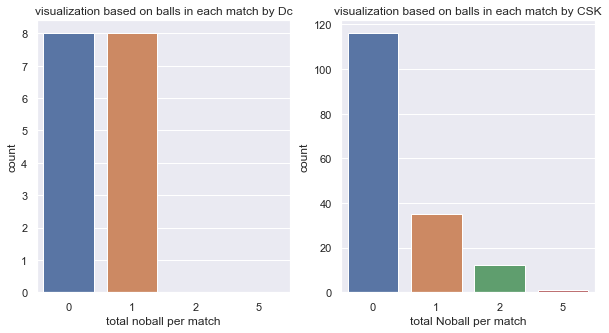

In [898]:
fig, axes = plt.subplots(1, 2,  sharex=True, figsize=(10,5))

ax1 = sns.countplot(ax=axes[0],x='total noball per match',data=Total_NOBALL_by_DC,order = Total_NOBALL_by_DC['total noball per match'].value_counts().index)
ax1.set_title('visualization based on balls in each match by Dc')
ax2 = sns.countplot(ax=axes[1],x='total Noball per match',data=Total_NOBALL_by_CSK,order = Total_NOBALL_by_CSK['total Noball per match'].value_counts().index)
ax2.set_title('visualization based on balls in each match by CSK')
plt.show()

**Answer:** based on above conclusion, In all csk vs dc match atmost 1 no ball was bowled. and in both teams individual bowling data analysis, 75% of the time onlyone no ball was bowled.So from given options 0-1 would fit right

**answer:** by performing exploratory dataanalysis the mean is around 307, i conclude Todays total might be less than 320.

**how many runs will be scored my csk in todays match?**

In [899]:
runs =deliveries.loc[(deliveries['batting_team'] == 'Chennai Super Kings')]

runs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14087,61,1,Chennai Super Kings,Kings XI Punjab,1,1,PA Patel,ML Hayden,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14088,61,1,Chennai Super Kings,Kings XI Punjab,1,2,PA Patel,ML Hayden,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14089,61,1,Chennai Super Kings,Kings XI Punjab,1,3,PA Patel,ML Hayden,B Lee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
14090,61,1,Chennai Super Kings,Kings XI Punjab,1,4,ML Hayden,PA Patel,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14091,61,1,Chennai Super Kings,Kings XI Punjab,1,5,ML Hayden,PA Patel,B Lee,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [900]:
Total_CSK_runs_per_match = runs.groupby('match_id')['total_runs'].sum()

In [901]:
Total_CSK_runs_per_match = pd.DataFrame({'total runs':Total_CSK_runs_per_match})

In [902]:
Total_CSK_runs_per_match

,total runs
match_id,
61,240
67,208
71,152
74,178
79,169
...,...
11341,186
11346,172
11412,136


In [903]:
Total_CSK_runs_per_match['total runs'].value_counts()

160    6
164    6
165    5
139    4
181    4
      ..
158    1
155    1
154    1
153    1
55     1
Name: total runs, Length: 89, dtype: int64

In [904]:
Total_CSK_runs_per_match.describe()

,total runs
count,164.000000
mean,161.085366
std,30.855571
min,55.000000
25%,142.000000
50%,162.000000
75%,182.250000
max,246.000000


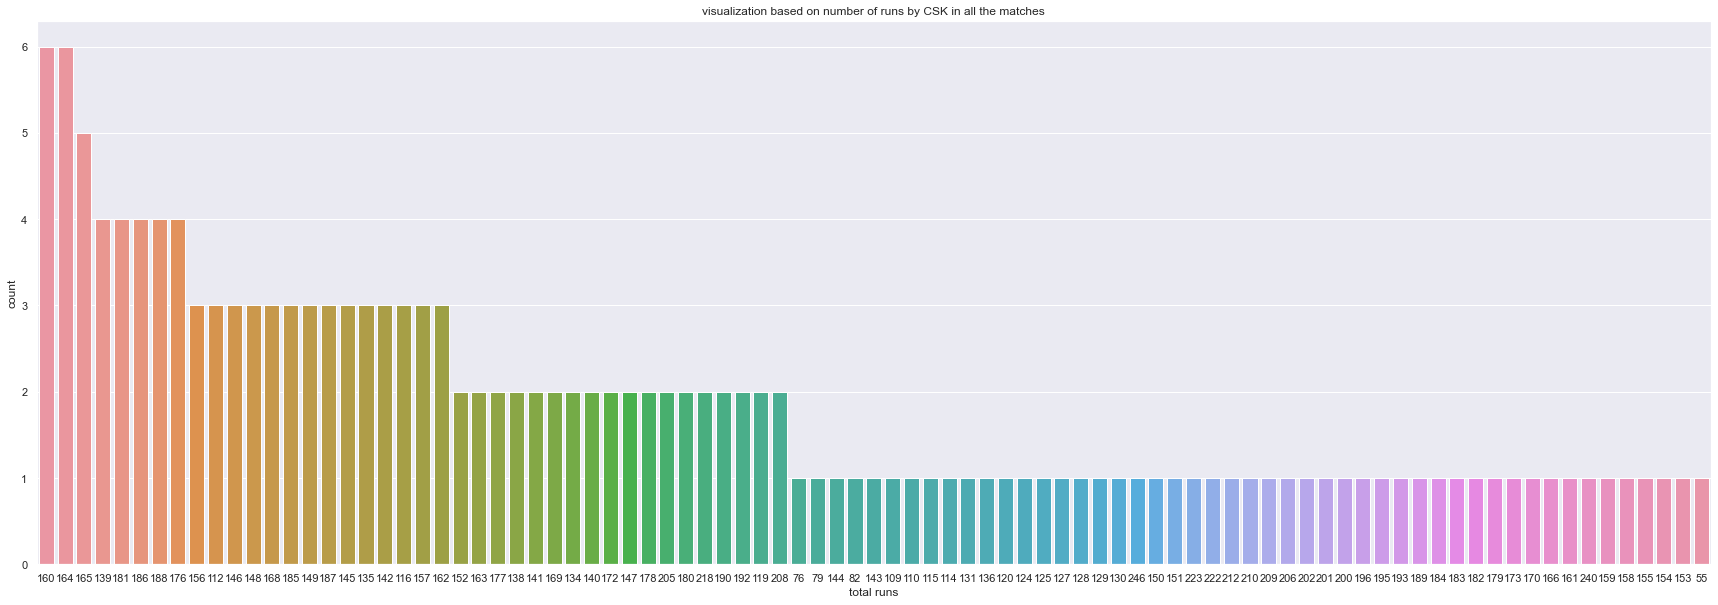

In [905]:
    plt.figure(figsize=(30,10))
    sns.countplot(x='total runs',data=Total_CSK_runs_per_match,order = Total_CSK_runs_per_match['total runs'].value_counts().index)
    plt.title('visualization based on number of runs by CSK in all the matches')
    plt.show()

analysis on only csk vs dc data

In [906]:
run1= cd.groupby('match_id')['total_runs'].sum()

In [907]:
run1.value_counts()

162    1
186    1
157    1
Name: total_runs, dtype: int64

In [908]:
run1.describe()

count      3.000000
mean     168.333333
std       15.502688
min      157.000000
25%      159.500000
50%      162.000000
75%      174.000000
max      186.000000
Name: total_runs, dtype: float64

**answer:** from above observation we can conclude that in all csk vs dc matches mean is aroubd 168 and mean of csk batting adat in all matches is around 161 so from given options 151-165 would fit right

**How many wickets will CSk take from 91st to 120th ball?**

analysing dc vs csk wicket data

In [909]:
wic =deliveries.loc[(deliveries['batting_team'] == 'Delhi Capitals') & (deliveries['bowling_team'] == 'Chennai Super Kings')]
wic

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165706,11141,1,Delhi Capitals,Chennai Super Kings,1,1,P Shaw,S Dhawan,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165707,11141,1,Delhi Capitals,Chennai Super Kings,1,2,P Shaw,S Dhawan,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165708,11141,1,Delhi Capitals,Chennai Super Kings,1,3,P Shaw,S Dhawan,DL Chahar,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
165709,11141,1,Delhi Capitals,Chennai Super Kings,1,4,P Shaw,S Dhawan,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
165710,11141,1,Delhi Capitals,Chennai Super Kings,1,5,P Shaw,S Dhawan,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178709,11414,1,Delhi Capitals,Chennai Super Kings,20,2,TA Boult,A Mishra,RA Jadeja,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
178710,11414,1,Delhi Capitals,Chennai Super Kings,20,3,TA Boult,A Mishra,RA Jadeja,0,...,0,0,0,0,0,0,0,TA Boult,bowled,NaN
178711,11414,1,Delhi Capitals,Chennai Super Kings,20,4,I Sharma,A Mishra,RA Jadeja,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178712,11414,1,Delhi Capitals,Chennai Super Kings,20,5,I Sharma,A Mishra,RA Jadeja,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [910]:
wic = wic[wic['over']>=16]

In [911]:
Total_wic =wic.groupby('match_id')['player_dismissed'].count()

In [912]:
WICKET = pd.DataFrame({'total wickets':Total_wic})  

In [913]:
WICKET 

,total wickets
match_id,
11141,4
11341,2
11414,4


In [914]:
WICKET['total wickets'].value_counts()

4    2
2    1
Name: total wickets, dtype: int64

In [915]:
WICKET.describe()

,total wickets
count,3.000000
mean,3.333333
std,1.154701
min,2.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,4.000000


analysing overall csk bowling data

In [916]:
wict =deliveries.loc[(deliveries['bowling_team'] == 'Chennai Super Kings')]
wict

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
14211,61,2,Kings XI Punjab,Chennai Super Kings,1,1,K Goel,JR Hopes,JDP Oram,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
14212,61,2,Kings XI Punjab,Chennai Super Kings,1,2,K Goel,JR Hopes,JDP Oram,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14213,61,2,Kings XI Punjab,Chennai Super Kings,1,3,K Goel,JR Hopes,JDP Oram,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
14214,61,2,Kings XI Punjab,Chennai Super Kings,1,4,K Goel,JR Hopes,JDP Oram,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
14215,61,2,Kings XI Punjab,Chennai Super Kings,1,5,JR Hopes,K Goel,JDP Oram,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178949,11415,1,Mumbai Indians,Chennai Super Kings,20,2,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178950,11415,1,Mumbai Indians,Chennai Super Kings,20,3,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178951,11415,1,Mumbai Indians,Chennai Super Kings,20,4,KA Pollard,MJ McClenaghan,DJ Bravo,0,...,0,0,0,0,1,0,1,MJ McClenaghan,run out,F du Plessis
178952,11415,1,Mumbai Indians,Chennai Super Kings,20,5,KA Pollard,JJ Bumrah,DJ Bravo,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [917]:
wict = wict[wict['over']>=16]

In [918]:
Total_wict =wict.groupby('match_id')['player_dismissed'].count()

In [919]:
WICKETs = pd.DataFrame({'total wickets':Total_wict})  

In [920]:
WICKETs

,total wickets
match_id,
61,1
67,2
71,3
74,7
79,0
...,...
11341,2
11346,1
11412,0


In [921]:
WICKETs['total wickets'].value_counts()

3    34
2    34
1    34
4    19
0    17
5    13
7     3
6     3
Name: total wickets, dtype: int64

In [922]:
WICKETs.describe()

,total wickets
count,157.000000
mean,2.445860
std,1.642367
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,7.000000


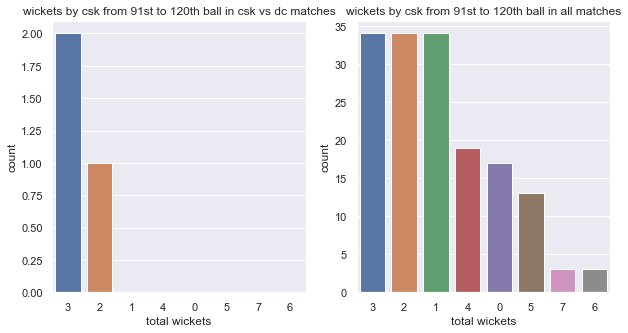

In [923]:
fig, axes = plt.subplots(1, 2,  sharex=True, figsize=(10,5))

ax1 = sns.countplot(ax=axes[0],x='total wickets',data=WICKET,order = WICKET['total wickets'].value_counts().index)
ax1.set_title('wickets by csk from 91st to 120th ball in csk vs dc matches')
ax2 = sns.countplot(ax=axes[1],x='total wickets',data=WICKETs,order = WICKETs['total wickets'].value_counts().index)
ax2.set_title('wickets by csk from 91st to 120th ball in all matches')
plt.show()

**answer:** from above analysis we achieved mean of 3.3 and 2.4 so i conclude 3-4 would be right prediction

**How many balls will csk take to score 100 runs?**

In [924]:
cenc =deliveries.loc[(deliveries['bowling_team'] == 'Delhi Capitals') & (deliveries['batting_team'] == 'Chennai Super Kings')]
cenc

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165831,11141,2,Chennai Super Kings,Delhi Capitals,1,1,SR Watson,AT Rayudu,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165832,11141,2,Chennai Super Kings,Delhi Capitals,1,2,SR Watson,AT Rayudu,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165833,11141,2,Chennai Super Kings,Delhi Capitals,1,3,AT Rayudu,SR Watson,I Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
165834,11141,2,Chennai Super Kings,Delhi Capitals,1,4,AT Rayudu,SR Watson,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165835,11141,2,Chennai Super Kings,Delhi Capitals,1,5,AT Rayudu,SR Watson,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178825,11414,2,Chennai Super Kings,Delhi Capitals,19,2,MS Dhoni,AT Rayudu,I Sharma,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
178826,11414,2,Chennai Super Kings,Delhi Capitals,19,3,MS Dhoni,AT Rayudu,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178827,11414,2,Chennai Super Kings,Delhi Capitals,19,4,MS Dhoni,AT Rayudu,I Sharma,0,...,0,0,0,0,0,0,0,MS Dhoni,caught,K Paul
178828,11414,2,Chennai Super Kings,Delhi Capitals,19,5,AT Rayudu,DJ Bravo,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


**end of day 3**